In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from functions import load_entire_track, load_track_section, plot_track_2d, \
        get_start, load_race_data_2022, load_race_data_2023, load_race_data_2024, \
        load_turn_data, filter_for_track_section

def remove_cols(df):
    return df.drop(
        columns=[
            'WORLDFORWARDDIRX', 'WORLDFOsRWARDDIRY', 'WORLDFORWARDDIRZ',
            'WORLDRIGHTDIRX', 'WORLDRIGHTDIRY', 'WORLDRIGHTDIRZ', 'GEAR',
            'ENGINE_RPM', 'YAW', 'PITCH', 'ROLL', 'SECTOR_1_TIME_MS',
            'SECTOR_2_TIME_MS', 'SECTOR_3_MS', 'LAP_TIME_MS', 'SECTOR'
        ],
        errors='ignore' # will not throw error if a column isn't found
    )

def euclidean_distance(x1, y1, x2, y2):
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5

In [5]:
LOCAL_DATA_DIR = '../../datasets'

race_data_2022 = load_race_data_2022(LOCAL_DATA_DIR, filter_for_section=True)
race_data_2023 = load_race_data_2023(LOCAL_DATA_DIR, filter_for_section=True)
race_data_2024 = load_race_data_2024(LOCAL_DATA_DIR, filter_for_section=True)

track = load_entire_track(LOCAL_DATA_DIR)
section = load_track_section(LOCAL_DATA_DIR)
turns = load_turn_data(LOCAL_DATA_DIR)

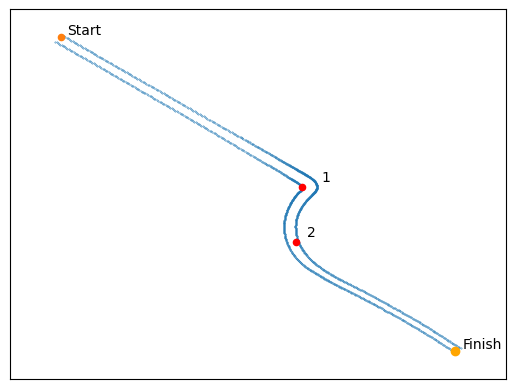

In [10]:
plot_track_2d(section)
plt.scatter(544.483276, -113.066963, c='orange')
plt.annotate(
        'Finish',
        (544.483276,-113.066963),
        textcoords="offset points",
        xytext=(5,10),
        ha='left',
        va='top'
    )

plt.scatter(data=turns, x='APEX_X1', y='APEX_Y1', c='red', s=20)
for i in range(turns.shape[0]):
    plt.annotate(
        turns['TURN'][i],
        (turns['APEX_X1'][i], turns['APEX_Y1'][i]),
        textcoords="offset points",
        xytext=(14,12) if i == 0 else (8, 12),
        ha='left',
        va='top'
    )

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',
    which='both',
    left=False,
    labelleft=False)

plt.savefig('../images/trackSection.png')
plt.show()

### Final dataset creation

In [3]:
from functions_final_features import build_dataset

In [4]:
df_2022 = build_dataset(race_data_2022, LOCAL_DATA_DIR)
df_2022.head()

Building dataset...
---------------------
    First brake features (319 rows) took 0.43 seconds
    Max brake features (321 rows) took 0.43 seconds
    First steering features (321 rows) took 0.42 seconds
    Max steering features (321 rows) took 0.42 seconds
    First throttle features (321 rows) took 0.75 seconds
    Max throttle features (321 rows) took 0.9 seconds
    Fixed distance 360m features (321 rows) took 0.45 seconds
    Fixed distance 387m features (321 rows) took 0.43 seconds
    Fixed distance 414m features (321 rows) took 0.42 seconds
    Fixed distance 441m features (321 rows) took 0.42 seconds
    Fixed distance 468m features (321 rows) took 0.42 seconds
    Fixed distance 495m features (321 rows) took 0.45 seconds
    Fixed distance 522m features (321 rows) took 0.42 seconds
    Invalid lap flag (321 rows) took 73.71 seconds
    Section time (321 rows) took 0.01 seconds
    Braking/throttle areas (321 rows) took 4.27 seconds
    Joining all feature tables took 0.01 s

,SESSION_IDENTIFIER,LAP_NUM,FB_DIST_FROM_LEFT,FB_DIST_FROM_RIGHT,FB_XPOS,FB_YPOS,FB_SPEED,FB_LAP_DIST,FB_THROTTLE,FB_BRAKE,...,TOTAL_BRAKING_387_414,TOTAL_THROTTLE_387_414,TOTAL_BRAKING_414_441,TOTAL_THROTTLE_414_441,TOTAL_BRAKING_441_468,TOTAL_THROTTLE_441_468,TOTAL_BRAKING_468_495,TOTAL_THROTTLE_468_495,TOTAL_BRAKING_495_522,TOTAL_THROTTLE_495_522
0,5.892042e+16,1,1.722782,13.294640,303.818085,284.591125,302,264.494629,0.000000,0.224170,...,0.000000,25.873340,0.000000,27.000000,0.0,27.000000,0.0,27.000000,1.172304,24.164652
1,5.892042e+16,2,2.665099,11.224043,271.283447,314.157196,299,220.511719,0.200626,0.412451,...,2.847642,17.984162,0.000000,27.000000,0.0,27.000000,0.0,27.000000,0.000000,27.000000
2,1.773021e+17,1,38.354385,51.437221,409.176727,134.969040,0,424.610046,0.043534,0.131563,...,1.177492,7.434916,0.509393,6.299859,0.0,9.841797,0.0,10.426209,0.000000,10.389576
3,1.773021e+17,2,9.243624,6.801326,358.626648,221.455887,201,347.767578,0.000000,0.000961,...,7.695727,0.000000,3.882757,0.068891,0.0,3.461258,0.0,6.020271,0.000000,6.630820
4,1.807268e+17,1,2.257019,13.127514,311.865936,276.254517,307,276.069916,0.121126,0.428428,...,0.000000,1.504754,0.000000,20.674356,0.0,26.593375,0.0,27.000000,1.283013,24.034093


In [5]:
df_2023 = build_dataset(race_data_2023, LOCAL_DATA_DIR)
df_2023.head()

Building dataset...
---------------------
    First brake features (492 rows) took 0.57 seconds
    Max brake features (500 rows) took 0.57 seconds
    First steering features (499 rows) took 0.57 seconds
    Max steering features (500 rows) took 0.56 seconds
    First throttle features (500 rows) took 1.16 seconds
    Max throttle features (500 rows) took 1.41 seconds
    Fixed distance 360m features (500 rows) took 0.61 seconds
    Fixed distance 387m features (500 rows) took 0.56 seconds
    Fixed distance 414m features (500 rows) took 0.56 seconds
    Fixed distance 441m features (500 rows) took 0.6 seconds
    Fixed distance 468m features (500 rows) took 0.59 seconds
    Fixed distance 495m features (500 rows) took 0.58 seconds
    Fixed distance 522m features (500 rows) took 0.57 seconds
    Invalid lap flag (500 rows) took 128.7 seconds
    Section time (500 rows) took 0.02 seconds
    Braking/throttle areas (500 rows) took 6.27 seconds
    Joining all feature tables took 0.02 s

,SESSION_IDENTIFIER,LAP_NUM,FB_DIST_FROM_LEFT,FB_DIST_FROM_RIGHT,FB_XPOS,FB_YPOS,FB_SPEED,FB_LAP_DIST,FB_THROTTLE,FB_BRAKE,...,TOTAL_BRAKING_387_414,TOTAL_THROTTLE_387_414,TOTAL_BRAKING_414_441,TOTAL_THROTTLE_414_441,TOTAL_BRAKING_441_468,TOTAL_THROTTLE_441_468,TOTAL_BRAKING_468_495,TOTAL_THROTTLE_468_495,TOTAL_BRAKING_495_522,TOTAL_THROTTLE_495_522
0,9.718583e+16,1,1.886816,12.852695,297.680695,290.156464,327.0,256.216125,0.193057,0.290349,...,0.000000,25.577962,0.000000,27.000000,3.519325,15.190043,0.0,26.046490,0.000000,27.000000
1,9.718583e+16,2,2.535936,12.735909,308.920135,278.658142,327.0,272.282227,0.317281,0.692393,...,0.000000,27.000000,0.000000,27.000000,0.000000,27.000000,0.0,27.000000,0.000000,27.000000
2,9.718583e+16,3,2.302189,12.913055,307.780426,280.056488,331.0,270.492188,0.297515,0.685805,...,0.000000,25.417687,0.000000,25.864459,0.000458,18.291015,0.0,27.000000,0.000000,27.000000
3,1.221455e+17,1,3.956174,11.757219,320.363892,265.828552,323.0,289.419220,0.000000,0.098054,...,0.000263,12.457893,0.038745,14.071332,0.309722,9.961457,0.0,14.472812,0.087423,11.386224
4,1.221455e+17,2,3.144086,11.203818,287.502045,298.047760,312.0,243.404297,0.000000,0.004990,...,8.571257,0.000000,6.159308,0.000000,0.672229,0.475241,0.0,2.766347,0.000000,5.343276


In [6]:
df_2024 = build_dataset(race_data_2024, LOCAL_DATA_DIR)
df_2024.head()

Building dataset...
---------------------
    First brake features (116 rows) took 0.24 seconds
    Max brake features (117 rows) took 0.25 seconds
    First steering features (116 rows) took 0.24 seconds
    Max steering features (117 rows) took 0.24 seconds
    First throttle features (117 rows) took 0.87 seconds
    Max throttle features (117 rows) took 1.0 seconds
    Fixed distance 360m features (117 rows) took 0.25 seconds
    Fixed distance 387m features (117 rows) took 0.25 seconds
    Fixed distance 414m features (117 rows) took 0.25 seconds
    Fixed distance 441m features (117 rows) took 0.24 seconds
    Fixed distance 468m features (117 rows) took 0.24 seconds
    Fixed distance 495m features (117 rows) took 0.24 seconds
    Fixed distance 522m features (117 rows) took 0.23 seconds
    Invalid lap flag (117 rows) took 81.26 seconds
    Section time (115 rows) took 0.03 seconds
    Braking/throttle areas (117 rows) took 0.46 seconds
    Joining all feature tables took 0.01 s

,SESSION_IDENTIFIER,LAP_NUM,FB_DIST_FROM_LEFT,FB_DIST_FROM_RIGHT,FB_XPOS,FB_YPOS,FB_SPEED,FB_LAP_DIST,FB_THROTTLE,FB_BRAKE,...,TOTAL_BRAKING_387_414,TOTAL_THROTTLE_387_414,TOTAL_BRAKING_414_441,TOTAL_THROTTLE_414_441,TOTAL_BRAKING_441_468,TOTAL_THROTTLE_441_468,TOTAL_BRAKING_468_495,TOTAL_THROTTLE_468_495,TOTAL_BRAKING_495_522,TOTAL_THROTTLE_495_522
0,1BF21BECE1C29DBFE0631718000AACA5,1,2.060399,12.738858,298.858382,288.806295,305.0,258,0.000000,0.000950,...,0.0,26.558727,0.0,27.0,0.0,27.0,0.0,27.0,0.0,27.0
1,1BF21BECE1C29DBFE0631718000AACA5,2,2.178261,12.488360,295.866887,291.467934,303.0,254,0.000000,0.000264,...,0.0,27.000000,0.0,27.0,0.0,27.0,0.0,27.0,0.0,27.0
2,1BFBC46846891C71E0631718000A65FB,1,2.060399,12.738858,298.858382,288.806295,305.0,258,0.000000,0.000950,...,0.0,26.558727,0.0,27.0,0.0,27.0,0.0,27.0,0.0,27.0
3,21198A4F132E1402E0631218000AC59A,1,1.962125,13.361997,310.566560,277.890718,322.0,274,0.908739,1.000000,...,0.0,27.000000,0.0,27.0,0.0,27.0,0.0,27.0,0.0,27.0
4,21198A4F132E1402E0631218000AC59A,2,2.022602,13.111502,306.161086,281.968978,321.0,268,0.732715,0.920649,...,0.0,27.000000,0.0,27.0,0.0,27.0,0.0,27.0,0.0,27.0


In [7]:
# add year column
df_2022['YEAR'] = 2022
df_2023['YEAR'] = 2023
df_2024['YEAR'] = 2024

final = pd.concat([df_2022, df_2023, df_2024])
print(f'{final.shape}')
print(f'Number of NULLs in final dataset: {sum(final.isna().sum())}')

(923, 225)
Number of NULLs in final dataset: 0


In [ ]:
# Check

In [14]:
final.to_csv('data.csv', index=False)

### Validate final dataset

In [43]:
print(f'Total rows: {len(df_2022) + len(df_2023) + len(df_2024)}')

Total rows: 845


In [13]:
nullcols_2022 = df_2022.columns[df_2022.isna().sum() != 0].tolist()
nullcols_2023 = df_2023.columns[df_2023.isna().sum() != 0].tolist()
nullcols_2024 = df_2024.columns[df_2024.isna().sum() != 0].tolist()

print(f'2022 null columns: {nullcols_2022}')
print(f'2023 null columns: {nullcols_2023}')
print(f'2024 null columns: {nullcols_2024}')

NameError: name 'df_2022' is not defined

In [68]:
nulls_2022 = df_2022[df_2022.isnull().any(axis=1)][nullcols_2022]
nulls_2022

""


In [67]:
nulls_2023 = df_2023[df_2023.isnull().any(axis=1)][nullcols_2023]
nulls_2023

,FB_ANGLE_APEX_1,FB_ANGLE_APEX_2,MB_ANGLE_APEX_1,MB_ANGLE_APEX_2,FS_ANGLE_APEX_1,FS_ANGLE_APEX_2,MS_ANGLE_APEX_1,MS_ANGLE_APEX_2,FT_ANGLE_APEX_1,FT_ANGLE_APEX_2,...,414_ANGLE_APEX_1,414_ANGLE_APEX_2,441_ANGLE_APEX_1,441_ANGLE_APEX_2,468_ANGLE_APEX_1,468_ANGLE_APEX_2,495_ANGLE_APEX_1,495_ANGLE_APEX_2,522_ANGLE_APEX_1,522_ANGLE_APEX_2
69388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84016,127.850374,108.455346,128.202283,109.065029,120.262009,99.198041,104.843587,88.570287,110.301591,91.8054,...,90.559196,-97.759764,85.815649,-90.918331,78.814661,-90.364861,NaN,NaN,-89.642917,-75.577557


In [18]:
nulls_2024 = df_2024[df_2024.isnull().any(axis=1)][nullcols_2024]
nulls_2024

""


### 2024 data with repeated XY coordinates across rows

In [5]:
import functions_interpolation as fi

c = fi.compute_interpolation_ratios(race_data_2024, 'CURRENT_LAP_TIME_MS')
# c[c['SESSION_IDENTIFIER'] == '212F4920E1E312BFE0631218000A84D4']
c

# p = fi.get_closest_points_to_cutoff(race_data_2024, 'CURRENT_LAP_TIME_MS')
# p


,SESSION_IDENTIFIER,LAP_NUM,x_before,y_before,lap_dist_before,CURRENT_LAP_TIME_MS_before,x_after,y_after,lap_dist_after,CURRENT_LAP_TIME_MS_after,c
0,1BF21BECE1C29DBFE0631718000AACA5,1,533.145501,-96.907970,749,11050,534.532160,-98.346490,751,11076,0.500490
1,1BF21BECE1C29DBFE0631718000AACA5,2,532.251843,-97.734589,749,10916,533.624067,-99.183472,751,10942,0.501112
2,1BFBC46846891C71E0631718000A65FB,1,533.145501,-96.907970,749,11050,534.532160,-98.346490,751,11076,0.500490
3,21198A4F132E1402E0631218000AC59A,1,532.953613,-97.085031,749,10706,534.329744,-98.532645,751,10732,0.500669
4,21198A4F132E1402E0631218000AC59A,2,532.576936,-97.433451,749,10753,533.945440,-98.886931,751,10779,0.500915
...,...,...,...,...,...,...,...,...,...,...,...
110,21316631306D4FCCE0631218000A64C5,1,531.319940,-94.513449,746,11471,537.413793,-101.124287,755,11590,0.556111
111,21316631306D4FCCE0631218000A64C5,2,532.978848,-97.062125,749,11265,533.646807,-97.804640,756,11356,6.007522
112,2131C72B6DF61371E0631218000ACBAE,1,528.447655,-91.727356,742,16420,536.565019,-100.547474,754,16702,0.333697
113,2131C72B6DF61371E0631218000ACBAE,2,522.276747,-83.805191,732,13619,535.890598,-98.453715,752,13942,0.100010


In [4]:
# There are many consecutive rows where WORLDXPOS and WORLDYPOS remain constant
# - this results in an 'infinity' c constant for linear interpolation
race_data_2024[
    (race_data_2024['SESSION_IDENTIFIER'] == '212F4920E1E312BFE0631218000A84D4')
    & (race_data_2024['LAP_DISTANCE'] > 740)
    & (race_data_2024['LAP_NUM'] == 2)].sort_values('LAP_DISTANCE').head(10)

,SESSION_IDENTIFIER,LAP_NUM,CURRENT_LAP_TIME_MS,LAP_TIME_MS,LAP_DISTANCE,WORLDPOSX,WORLDPOSY,SPEED_KPH,THROTTLE,STEERING,BRAKE,WORLDFORWARDDIRX,WORLDFORWARDDIRY,lap_dist_to_finish,lap_dist_from_finish
260091,212F4920E1E312BFE0631218000A84D4,2,15654,122328,741,527.176848,-91.549839,210.0,0.670036,0.005224,0.0,-21562.0,-244.0,9,-9
260092,212F4920E1E312BFE0631218000A84D4,2,15677,122328,742,527.835395,-92.300946,210.0,0.670390,0.005588,0.0,-21549.0,-234.0,8,-8
260093,212F4920E1E312BFE0631218000A84D4,2,15700,122328,743,528.493942,-93.052053,210.0,0.670743,0.005953,0.0,-21536.0,-223.0,7,-7
260094,212F4920E1E312BFE0631218000A84D4,2,15719,122328,744,529.151940,-93.803520,211.0,0.670874,0.005784,0.0,-21524.0,-212.0,6,-6
260161,212F4920E1E312BFE0631218000A84D4,2,15730,122328,745,529.808749,-94.555768,211.0,0.670522,0.004459,0.0,-21512.0,-199.0,5,-5
260162,212F4920E1E312BFE0631218000A84D4,2,15741,122328,746,530.465558,-95.308016,211.0,0.670170,0.003134,0.0,-21500.0,-186.0,4,-4
260163,212F4920E1E312BFE0631218000A84D4,2,15755,122328,747,531.121958,-96.060592,212.0,0.670076,0.001480,0.0,-21491.0,-183.0,3,-3
260164,212F4920E1E312BFE0631218000A84D4,2,15772,122328,748,531.777651,-96.813735,212.0,0.670426,-0.000745,0.0,-21487.0,-197.0,2,-2
520757,212F4920E1E312BFE0631218000A84D4,2,15788,122328,749,532.433344,-97.566878,212.0,0.670777,-0.002969,0.0,-21484.0,-212.0,1,-1
520758,212F4920E1E312BFE0631218000A84D4,2,15805,122328,750,533.088881,-98.319999,213.0,0.670985,-0.005682,0.0,-21486.0,-224.0,0,0


In [24]:
# Fixed
unique_dists = race_data_2024.loc[race_data_2024[['WORLDPOSX', 'WORLDPOSY']].drop_duplicates().index]
unique_dists[unique_dists['LAP_DISTANCE'] > 730].head()

,SESSION_IDENTIFIER,LAP_NUM,CURRENT_LAP_TIME_MS,LAP_TIME_MS,LAP_DISTANCE,WORLDPOSX,WORLDPOSY,SPEED_KPH,THROTTLE,STEERING,BRAKE,WORLDFORWARDDIRX,WORLDFORWARDDIRY,lap_dist_to_finish,lap_dist_from_finish
3330,211C98F7A4BA963EE0631218000AB662,1,10623,81046,740,523.960407,-90.465580,280.0,1.0,0.012225,0.0,-22894.0,-66.0,10,-10
3490,211C98F7A4BA963EE0631218000AB662,1,10750,81046,750,532.310910,-99.038510,282.0,1.0,0.012674,0.0,-22599.0,-54.0,0,0
3491,211C98F7A4BA963EE0631218000AB662,1,10763,81046,751,533.000924,-99.758374,282.0,1.0,0.012669,0.0,-22574.0,-64.0,-1,1
3492,211C98F7A4BA963EE0631218000AB662,1,10776,81046,752,533.690938,-100.478238,282.0,1.0,0.012664,0.0,-22550.0,-74.0,-2,2
3493,211C98F7A4BA963EE0631218000AB662,1,10788,81046,753,534.380952,-101.198102,282.0,1.0,0.012659,0.0,-22525.0,-84.0,-3,3


### Optimise calculating distance to track edges - didn't work as well as wanted

In [13]:
from functions import update_data_w_distances, get_track_sides, two_closest_points, projection_values

df = load_race_data_2023(LOCAL_DATA_DIR, filter_for_section=True, remove_unused_cols=False)
# df = df.head(2000) # just use 50 rows..otherwise takes long

In [14]:
# Using the original function

start = time.time()
obtained_with_orig = update_data_w_distances(df, section)
end = time.time()

print(f"Time taken: {end - start}")
obtained_with_orig.tail()

KeyboardInterrupt: 

In [ ]:
# Binary search attempt to get two closest points on track edge...

def distance(pos1, pos2):
    return euclidean_distance(pos1[0], pos1[1], pos2[0], pos2[1])

def find_closer_half(car, track_side):
    lo = 0
    hi = len(track_side) - 1
    mid = (lo+hi)//2

    lo_mid = (lo+mid)//2
    hi_mid = (mid+1+hi)//2

    if distance(car, track_side[lo_mid]) < distance(car, track_side[hi_mid]):
        find_closer_half(car, track_side[:mid+1])
    else:
        find_closer_half(car, track_side[mid+1:])


# init: set lowerBound to 0, upperBound to last point index, get middle point index
# get two halves (upper and lower) split by middle, and find dist from midpoint of upper and lower respectively
# from whichever half has the smaller distance, set the bounds to that half
# repeat
# after finding closest point, test the two adjacent points for second closest

# Our function, get_closest_points should have inputs a single car point with
# list of track points, and output the two closest points
# > car_pos = (X, Y)
# > track_side = list of track side coords [(x1,y1), (x2,y2), ...] just for left/right



In [12]:
def distance(pos1, pos2):
    return euclidean_distance(pos1[0], pos1[1], pos2[0], pos2[1])

def point_within_cutoff(car, track_pt, cutoff):
    return abs(car[0] - track_pt[0]) < cutoff and abs(car[1] - track_pt[1]) < cutoff
    # ^ perhaps could even just do with one condition - cutoff only X or Y

def find_closest_points(car, track_edge):
    CUTOFF = 18
    close_track_points = [pt for pt in track_edge if point_within_cutoff(car, pt, CUTOFF)]

    min_pos = (-1, -1)
    min_dist = 1000
    sec_pos = (-1, -1)
    sec_dist = 1000
    for pt in close_track_points:
        dist = distance(car, pt)
        if dist < min_dist:
            sec_pos = min_pos
            sec_dist = min_dist
            min_pos = pt
            min_dist = dist
        elif dist < sec_dist:
            sec_pos = pt
            sec_dist = dist

    return min_pos, sec_pos

start = time.time()

left, right = get_track_sides(section)
left_list = left[['WORLDPOSX', 'WORLDPOSY']].values.tolist()
right_list = right[['WORLDPOSX', 'WORLDPOSY']].values.tolist()

df['c1_l'] = df.apply(lambda x: find_closest_points([x['WORLDPOSX'], x['WORLDPOSY']], left_list)[0], axis=1)
df['c2_l'] = df.apply(lambda x: find_closest_points([x['WORLDPOSX'], x['WORLDPOSY']], left_list)[1], axis=1)
df['DISTFROMLEFT'] = df.apply(lambda x: projection_values([x['WORLDPOSX'], x['WORLDPOSY']], x['c1_l'], x['c2_l'])['d'], axis=1)

df['c1_r'] = df.apply(lambda x: find_closest_points([x['WORLDPOSX'], x['WORLDPOSY']], right_list)[0], axis=1)
df['c2_r'] = df.apply(lambda x: find_closest_points([x['WORLDPOSX'], x['WORLDPOSY']], right_list)[1], axis=1)
df['DISTFROMRIGHT'] = df.apply(lambda x: projection_values([x['WORLDPOSX'], x['WORLDPOSY']], x['c1_r'], x['c2_r'])['d'], axis=1)

df['USER_TRACKWIDTH'] = df['DISTFROMLEFT'] + df['DISTFROMRIGHT']

df.drop(columns=['c1_l', 'c2_l', 'c1_r', 'c2_r'], inplace=True)
end = time.time()

print(f"Time taken: {end - start}")
df.tail()

In [ ]:
# Algorithm steps...

# 1. find the two closest points on left to the car
# input: one XY point, many track XY points


# 2. project car position onto the line formed by the two points


# 3. find the distance between the projected point and the car position

In [69]:
assert(df.equals(obtained_with_orig))

### How/where should we define our features?
Here I take the fast drivers (lap time < 85s) and plot their brake/throttle pattern over our track section to see if there are any patterns. This might inform what definition we use for the 'braking point'.

In [19]:
laps22 = race_data_2022[['SESSION_IDENTIFIER', 'LAP_NUM']].drop_duplicates().shape[0]
laps23 = race_data_2023[['SESSION_IDENTIFIER', 'LAP_NUM']].drop_duplicates().shape[0]
laps24 = race_data_2024[['SESSION_IDENTIFIER', 'LAP_NUM']].drop_duplicates().shape[0]

laps_total = laps22 + laps23 + laps24
print(f'{laps_total} laps in total across 22, 23, 24')

858 laps in total across 22, 23, 24


### Find the point where the driver was closest to the apex

In [6]:
# The time intervals between each observation are quite large and inconsistent
# in 2022 (up to 3 seconds at times), meaning we only have 5 rows for the
# turn 1-2 section from the fastest lap in 2022.
fastest_time_2022 = race_data_2022['LAP_TIME_MS'].min()
fastest_lap_rows_2022 = race_data_2022[race_data_2022['LAP_TIME_MS'] == fastest_time_2022] \
    .sort_values(by='LAP_DISTANCE')
fastest_lap_rows_2022.shape

(196, 11)

In [7]:
# 2023 data seems to have much more frequent observations, giving us 196 rows
# for the same section of the track from the fastest lap.
fastest_time_2023 = race_data_2023['LAP_TIME_MS'].min()
fastest_lap_rows_2023 = race_data_2023[race_data_2023['LAP_TIME_MS'] == fastest_time_2023] \
    .sort_values(by='LAP_DISTANCE')
fastest_lap_rows_2023.shape

(216, 30)

In [8]:
turn_1 = turns[turns['TURN'] == 1]
apex_turn_1 = (turn_1['APEX_X1'].values[0], turn_1['APEX_Y1'].values[0])
turn_2 = turns[turns['TURN'] == 2]
apex_turn_2 = (turn_2['APEX_X1'].values[0], turn_2['APEX_Y1'].values[0])

print(f'Apex of turn 1: {apex_turn_1}')
print(f'Apex of turn 2: {apex_turn_2}')

Apex of turn 1: (np.float64(375.57), np.float64(191.519))
Apex of turn 2: (np.float64(368.93), np.float64(90.0))


In [9]:
fastest_lap_rows_2023 = remove_cols(fastest_lap_rows_2023)
fastest_lap_rows_2023

fastest_lap_rows_2023['dist_apex_1'] = euclidean_distance(
    fastest_lap_rows_2023['WORLDPOSX'], # x1
    fastest_lap_rows_2023['WORLDPOSY'], # y1
    apex_turn_1[0],                     # x2
    apex_turn_1[1]                      # y2
)

fastest_lap_rows_2023['dist_apex_2'] = euclidean_distance(
    fastest_lap_rows_2023['WORLDPOSX'], # x1
    fastest_lap_rows_2023['WORLDPOSY'], # y1
    apex_turn_2[0],                     # x2
    apex_turn_2[1]                      # y2
)

In [10]:
row_closest_apex_1, row_closest_apex_2 = fastest_lap_rows_2023[['dist_apex_1', 'dist_apex_2']] \
    .idxmin().tolist()

def print_details(single_lap_rows, index, turn):
    """
    Args:
        single_lap_rows (pd.DataFrame): Rows of race data
        index (int): The row index to print details for
        turn (int)L The turn number the details correspond to
    """
    print(f'''
    Closest point to turn {turn} apex
    ----------------------------
        Row index: {index}
        Lap_distance: {round(single_lap_rows.loc[index, 'LAP_DISTANCE'],2)}
        Distance to apex: {round(single_lap_rows.loc[index, 'dist_apex_1'], 2)}
        Speed: {single_lap_rows.loc[index, 'SPEED_KPH']}
        Throttle: {single_lap_rows.loc[index, 'THROTTLE']}
        Brake: {single_lap_rows.loc[index, 'BRAKE']}
        Steering: {round(single_lap_rows.loc[index, 'STEERING'], 2)}
    ''')

print('''For the fastest lap in 2023 data, we find the following attributes of the
car at the closest point to the apexes of turns 1 and 2. These measures will
each be turned into a feature in our final dataset.''')

print_details(fastest_lap_rows_2023, row_closest_apex_1, 1)
print_details(fastest_lap_rows_2023, row_closest_apex_2, 2)

For the fastest lap in 2023 data, we find the following attributes of the
car at the closest point to the apexes of turns 1 and 2. These measures will
each be turned into a feature in our final dataset.

    Closest point to turn 1 apex
    ----------------------------
        Row index: 776025
        Lap_distance: 388.64
        Distance to apex: 0.76
        Speed: 168.0
        Throttle: 0.3270923793315887
        Brake: 0.0
        Steering: 0.44
    

    Closest point to turn 2 apex
    ----------------------------
        Row index: 776065
        Lap_distance: 494.71
        Distance to apex: 101.11
        Speed: 206.0
        Throttle: 1.0
        Brake: 0.0
        Steering: -0.09
    


In [11]:
# TODO: make the code used to find these closest points (and attributes at the
# closest point) into a function that can do it for all laps in the dataset.

In [12]:
# Find lap distance of apex 1
race_data_2023['dist_apex_1'] = euclidean_distance(
    race_data_2023['WORLDPOSX'], # x1
    race_data_2023['WORLDPOSY'], # y1
    apex_turn_1[0],                     # x2
    apex_turn_1[1]                      # y2
)

race_data_2023.sort_values(by='dist_apex_1')[['LAP_DISTANCE', 'dist_apex_1']].head(3)
# apex 1 roughly 387m

,LAP_DISTANCE,dist_apex_1
636155,387.555664,0.073910
781108,387.302246,0.084760
181188,387.408691,0.113413


In [13]:
race_data_2023['dist_apex_2'] = euclidean_distance(
    race_data_2023['WORLDPOSX'], # x1
    race_data_2023['WORLDPOSY'], # y1
    apex_turn_2[0],                     # x2
    apex_turn_2[1]                      # y2
)
race_data_2023.sort_values(by='dist_apex_2')[['LAP_DISTANCE', 'dist_apex_2']].head(3)
# apex 2 roughly 495m

,LAP_DISTANCE,dist_apex_2
964145,495.068359,0.027709
1084325,495.090820,0.060694
673461,495.080078,0.078935


### Compute time taken to complete our track section [Algorithm 3]

In [14]:
from functions_interpolation import add_section_time_column, add_interpolated_column

race_data_2023_with_time = add_section_time_column(race_data_2023)
race_data_2023_with_time.head(3)

,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,...,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ,lap_dist_to_finish,lap_dist_from_finish,dist_apex_1,dist_apex_2,SECTION_TIME_MS
0,1.003468e+19,1680,1,0,1.775714,16,30129,18569,87226.0,38528.0,...,-138.0,-22714.0,22704.0,846.0,-23610.0,748.224286,-748.224286,379.209819,454.152599,11442.0
1,1.003468e+19,1681,1,0,5.864580,66,30129,18569,87226.0,38528.0,...,-190.0,-22641.0,22630.0,850.0,-23681.0,744.135420,-744.135420,375.123030,450.150823,11442.0
2,1.003468e+19,1682,1,0,9.964501,116,30129,18569,87226.0,38528.0,...,-195.0,-22557.0,22547.0,812.0,-23761.0,740.035499,-740.035499,371.025598,446.141843,11442.0


In [15]:
add_interpolated_column(race_data_2023, 'SPEED_KPH').head(3)

,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,...,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ,lap_dist_to_finish,lap_dist_from_finish,dist_apex_1,dist_apex_2,SPEED_KPH_at_cutoff
0,1.003468e+19,1680,1,0,1.775714,16,30129,18569,87226.0,38528.0,...,-138.0,-22714.0,22704.0,846.0,-23610.0,748.224286,-748.224286,379.209819,454.152599,277.61826
1,1.003468e+19,1681,1,0,5.864580,66,30129,18569,87226.0,38528.0,...,-190.0,-22641.0,22630.0,850.0,-23681.0,744.135420,-744.135420,375.123030,450.150823,277.61826
2,1.003468e+19,1682,1,0,9.964501,116,30129,18569,87226.0,38528.0,...,-195.0,-22557.0,22547.0,812.0,-23761.0,740.035499,-740.035499,371.025598,446.141843,277.61826


### How/where should we define our features?
Here I take the fast drivers (lap time < 85s) and plot their brake/throttle pattern over our track section to see if there are any patterns. This might inform what definition we use for the 'braking point'.

In [16]:
APEX_1_LAP_DIST = 387
APEX_2_LAP_DIST = 495

from functions_interpolation import interpolate_section_times

section_times = interpolate_section_times(race_data_2023)

def get_lap(lapID):
    # lapID is a tuple/list of [SESSION_IDENTIFIER, LAP_NUM]
    return race_data_2023[
        (race_data_2023['SESSION_IDENTIFIER'] == lapID[0]) &
        (race_data_2023['LAP_NUM'] == lapID[1])
    ]

def get_section_time(lapID):
    # lapID is a tuple/list of [SESSION_IDENTIFIER, LAP_NUM]
    return section_times[
        (section_times['SESSION_IDENTIFIER'] == lapID[0]) &
        (section_times['LAP_NUM'] == lapID[1])
    ]['SECTION_TIME_MS'].values[0]

fast_lap_rows = race_data_2023_with_time[race_data_2023_with_time['SECTION_TIME_MS'] < 15000].sort_values(by='SECTION_TIME_MS', ascending=True)
fast_laps = fast_lap_rows[['SESSION_IDENTIFIER', 'LAP_NUM']].drop_duplicates().values.tolist()
# fast_laps has [SESSIONID, LAPNUM] pairs

slow_lap_rows = race_data_2023_with_time[
    (race_data_2023_with_time['SECTION_TIME_MS'] < 30000) &
    (race_data_2023_with_time['SECTION_TIME_MS'] > 15000)
].sort_values(by='SECTION_TIME_MS', ascending=False)
slow_laps = slow_lap_rows[['SESSION_IDENTIFIER', 'LAP_NUM']].drop_duplicates().values.tolist()

In [17]:
fast_lap_rows.columns

Index(['SESSION_IDENTIFIER', 'FRAME', 'LAP_NUM', 'SECTOR', 'LAP_DISTANCE',
       'CURRENT_LAP_TIME_MS', 'SECTOR_1_TIME_MS', 'SECTOR_2_TIME_MS',
       'LAP_TIME_MS', 'SECTOR_3_MS', 'SPEED_KPH', 'THROTTLE', 'BRAKE', 'GEAR',
       'ENGINE_RPM', 'STEERING', 'YAW', 'PITCH', 'ROLL', 'WORLDPOSX',
       'WORLDPOSY', 'WORLDPOSZ', 'WORLDFORWARDDIRX', 'WORLDFORWARDDIRY',
       'WORLDFORWARDDIRZ', 'WORLDRIGHTDIRX', 'WORLDRIGHTDIRY',
       'WORLDRIGHTDIRZ', 'lap_dist_to_finish', 'lap_dist_from_finish',
       'dist_apex_1', 'dist_apex_2', 'SECTION_TIME_MS'],
      dtype='object')

In [18]:
def plot_brake_throttle(lap_id):
    # lapID is a tuple/list of [SESSION_IDENTIFIER, LAP_NUM]
    fast_lap_rows = get_lap(lap_id)
    section_time = round(get_section_time(lap_id)/1000, 2)
    lap_time = round(fast_lap_rows["LAP_TIME_MS"].values[0] / 1000, 2)

    fig, ax = plt.subplots(4,1, figsize=(6,10), tight_layout=True)
    # Section time here is for the first 750m (not exact to the section cutoff Tom makes)
    fig.suptitle(f'Section time: {section_time} s; Lap time: {lap_time}s')

    ax[0].plot(fast_lap_rows['LAP_DISTANCE'], fast_lap_rows['THROTTLE'])
    ax[0].set_ylim(-0.05, 1.1)
    ax[1].plot(fast_lap_rows['LAP_DISTANCE'], fast_lap_rows['BRAKE'])
    ax[1].set_ylim(-0.05, 1.1)
    ax[2].plot(fast_lap_rows['LAP_DISTANCE'], fast_lap_rows['STEERING'])
    ax[2].set_ylim(-1.05, 1.05)
    ax[3].plot(fast_lap_rows['LAP_DISTANCE'], fast_lap_rows['SPEED_KPH'])
    ax[3].set_ylim(0, 350)

    for i, metric in [(0,'Throttle'), (1, 'Brake'), (2, 'Steering'), (3, 'Speed')]:
        ax[i].set_xlabel('Lap distance (m)')
        ax[i].set_ylabel(metric)
        ax[i].set_title(metric)
        ax[i].axvline(x=APEX_1_LAP_DIST, color='r', linestyle='--')
        ax[i].text(APEX_1_LAP_DIST, 30 if i == 3 else 0.1, 'Apex 1', color='r', rotation=90)
        ax[i].axvline(x=APEX_2_LAP_DIST, color='r', linestyle='--')
        ax[i].text(APEX_2_LAP_DIST, 30 if i == 3 else 0.1, 'Apex 2', color='r', rotation=90)

    plt.show()

def plot_fast_brake_throttle_from_idx(idx):
    plot_brake_throttle(fast_laps[idx])

fast_lap_idx = 0
def plot_fast_next_brake_throttle():
    global fast_lap_idx
    plot_fast_brake_throttle_from_idx(fast_lap_idx)
    fast_lap_idx += 1

def plot_slow_brake_throttle_from_idx(idx):
    plot_brake_throttle(slow_laps[idx])

slow_lap_idx = 0
def plot_slow_next_brake_throttle():
    global slow_lap_idx
    plot_slow_brake_throttle_from_idx(slow_lap_idx)
    slow_lap_idx += 1

In [19]:
# plot_fast_next_brake_throttle()

In [20]:
# plot_slow_next_brake_throttle()

In [21]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def plot_everything(lap_id):
    # lapID is a tuple/list of [SESSION_IDENTIFIER, LAP_NUM]
    fast_lap_rows = get_lap(lap_id)
    section_time = round(get_section_time(lap_id)/1000, 2)
    lap_time = round(fast_lap_rows["LAP_TIME_MS"].values[0] / 1000, 2)

    fig = plt.figure(layout="constrained", figsize=(10,6))
    fig.suptitle(f'Section time: {section_time} s; Lap time: {lap_time}s')
    gs = GridSpec(4, 2, figure=fig)

    def format_axes(fig):
        title_size = 10
        label_size = 8
        for i, ax in enumerate(fig.axes):
            if i == 4: break
            metrics = ['Throttle', 'Brake', 'Steering', 'Speed']
            if i == 3:
                ax.set_xlabel('Lap distance (m)', fontsize=label_size)
            ax.set_ylabel(metrics[i], fontsize=label_size)
            ax.set_title(metrics[i], fontsize=title_size)
            ax.axvline(x=APEX_1_LAP_DIST, color='r', linestyle='--')
            ax.text(APEX_1_LAP_DIST, 0.1 if i == 3 else 0.1, 'Apex 1', color='r', rotation=90)
            ax.axvline(x=APEX_2_LAP_DIST, color='r', linestyle='--')
            ax.text(APEX_2_LAP_DIST, 0.1 if i == 3 else 0.1, 'Apex 2', color='r', rotation=90)

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(fast_lap_rows['LAP_DISTANCE'], fast_lap_rows['THROTTLE'])
    ax1.set_ylim(-0.05, 1.1)

    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(fast_lap_rows['LAP_DISTANCE'], fast_lap_rows['BRAKE'])
    ax2.set_ylim(-0.05, 1.1)

    ax3 = fig.add_subplot(gs[2, 0])
    ax3.plot(fast_lap_rows['LAP_DISTANCE'], fast_lap_rows['STEERING'])
    ax3.set_ylim(-1.05, 1.05)

    ax4 = fig.add_subplot(gs[3, 0])
    ax4.plot(fast_lap_rows['LAP_DISTANCE'], fast_lap_rows['SPEED_KPH'])
    ax4.set_ylim(0, 400)
    ax4.set_yticks(np.arange(0, 400, 100))

    start = get_start()
    ax5 = fig.add_subplot(gs[:, 1])
    ax5.scatter(data=filter_for_track_section(track), x='WORLDPOSX', y='WORLDPOSY', s=0.1, c='gray')
    ax5.scatter(data=start, x='WORLDPOSX', y='WORLDPOSY', s=20)
    ax5.annotate('Start', (start['WORLDPOSX'].loc[0],start['WORLDPOSY'].loc[0]),
                 textcoords="offset points", xytext=(5,10), ha='left', va='top')
    ax5.scatter(data=turns.iloc[:2], x='APEX_X1', y='APEX_Y1', c='red', s=20)
    for i in [0,1]:
        ax5.annotate(f'Apex {turns['TURN'][i]}', (turns['APEX_X1'][i], turns['APEX_Y1'][i]),
                     textcoords="offset points", xytext=(5,12), ha='left', va='top', c='r')
    ax5.scatter(fast_lap_rows['WORLDPOSX'], fast_lap_rows['WORLDPOSY'], s=3, c='C0')
    # ax5.plot(fast_lap_rows['WORLDPOSX'], fast_lap_rows['WORLDPOSY'])

    format_axes(fig)
    plt.show()


everything_lap_idx = 0
def plot_next_everything(slow=False):
    global everything_lap_idx
    if slow:
        plot_everything(slow_laps[everything_lap_idx])
    else:
        plot_everything(fast_laps[everything_lap_idx])
    everything_lap_idx += 1

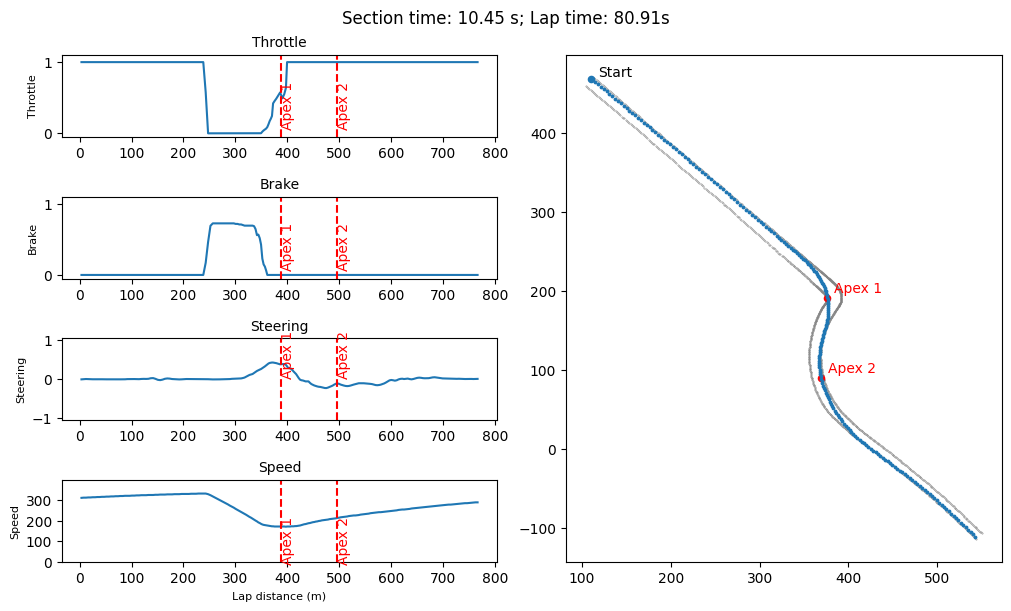

In [22]:
plot_next_everything(slow=False)

In [23]:
section_fastest_lap_id = section_times.loc[section_times['section_time_ms'].idxmin()][['SESSION_IDENTIFIER', 'LAP_NUM']].values.tolist()
section_slowest_lap_id = section_times.loc[section_times['section_time_ms'].idxmax()][['SESSION_IDENTIFIER', 'LAP_NUM']].values.tolist()

# TODO: filter section_times so they only include people with laps faster than XX seconds

# plot_brake_throttle(section_fastest_lap_id)
# plot_brake_throttle(section_slowest_lap_id)

KeyError: 'section_time_ms'

### Find a suitable end point for our section of track

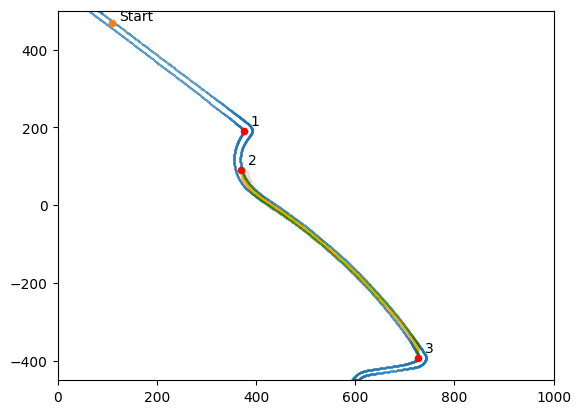

In [33]:
whole_2022 = pd.read_csv(LOCAL_DATA_DIR + '/F1Sim Data 2022.csv')
turn_2 = turns[turns['TURN'] == 2]
turn_3 = turns[turns['TURN'] == 3]
start = get_start()

# filter the 2022 race data to only include data from start to turn 3
between_turns_2_3 = whole_2022[
    (whole_2022['WORLDPOSX'] <= turn_3['APEX_X1'].values[0]) &
    (whole_2022['WORLDPOSX'] >= turn_2['APEX_X1'].values[0]) &
    (whole_2022['WORLDPOSY'] >= turn_3['APEX_Y1'].values[0]) &
    (whole_2022['WORLDPOSY'] <= turn_2['APEX_Y1'].values[0])
]

# plot to check it worked
plot_track_2d(track, turns)
plt.scatter(x=between_turns_2_3['WORLDPOSX'], y=between_turns_2_3['WORLDPOSY'], c='orange', alpha=0.005, s=1)
plt.xlim(0, 1000)
plt.ylim(-450, 500)
plt.show()

In [34]:
# SEE THE LAST POINT WHERE EACH DRIVER IS AT THEIR TOP SPEED
idx = between_turns_2_3 \
    .groupby(['SESSION_IDENTIFIER', 'LAP_NUM'])['SPEED_KPH'] \
    .transform('max') == between_turns_2_3['SPEED_KPH']
top_speed_turns_2_3 = between_turns_2_3[idx]

last_point_top_speed_2_3 = top_speed_turns_2_3 \
    .drop_duplicates(
        subset=['SESSION_IDENTIFIER', 'LAP_NUM', 'SPEED_KPH'],
        keep='last'
    )
last_point_top_speed_2_3 = remove_cols(last_point_top_speed_2_3)

last_point_top_speed_2_3.head()

,SESSION_IDENTIFIER,FRAME,LAP_NUM,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SPEED_KPH,THROTTLE,BRAKE,STEERING,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRY
17,1.004555e+19,1623,1,863.154053,12354,294,1.000000,0.00000,0.004257,606.499329,-184.138931,2.894550,-48.0
70,1.004555e+19,3512,2,504.290039,7474,206,1.000000,0.00000,-0.096452,371.723663,81.512985,2.505105,179.0
130,1.004555e+19,5419,3,878.671875,12646,296,1.000000,0.00000,0.007004,616.457764,-196.030945,2.858782,-95.0
215,1.004555e+19,7336,4,885.423828,12787,297,1.000000,0.00000,0.020645,621.063721,-201.008743,2.845607,-108.0
553,1.004645e+19,1980,1,989.343262,14873,301,0.555657,0.13051,0.005447,681.207886,-285.777344,2.551439,-5.0


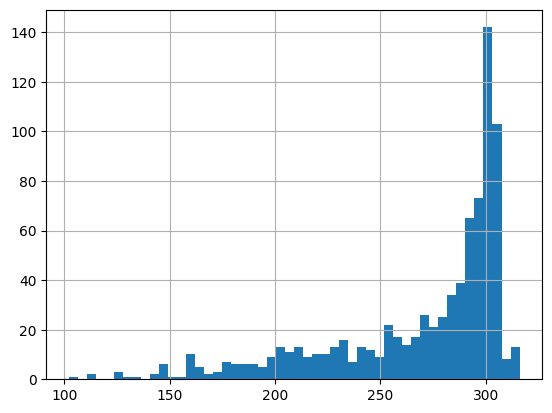

In [35]:
# Plotting the top speeds observed shows that not all drivers are on flying laps
# - e.g. if the driver's top speed between turns 2 and 3 is 200kph, they're not
# actually trying to go as fast as possible.
last_point_top_speed_2_3['SPEED_KPH'].hist(bins=50)
plt.show()

# For this reason, we filter for rows where the top speed is higher than 280kph
# to see where the drivers (when trying to go fast) are just before they start
# decelerating for turn 3
cutoff = 280
last_point_top_speed_2_3 = last_point_top_speed_2_3[last_point_top_speed_2_3['SPEED_KPH'] > cutoff]

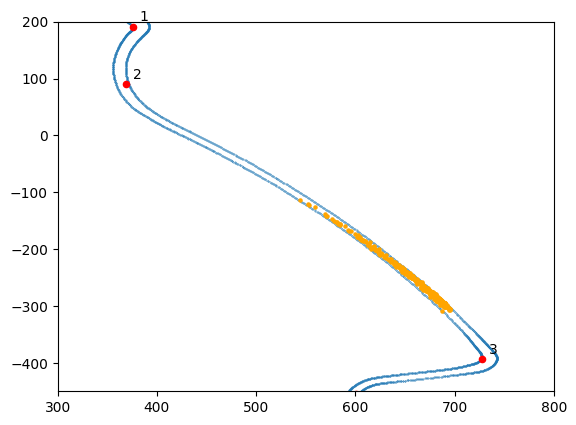

The earliest deceleration point (of drivers who reached more than 280kph) - this row corresponds to the top-leftmost yellow point in the chart above:


,SESSION_IDENTIFIER,FRAME,LAP_NUM,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SPEED_KPH,THROTTLE,BRAKE,STEERING,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRY
182302,1.405430e+19,6269,4,768.630859,10885,285,1.0,0.0,0.007736,544.483276,-113.066963,3.143606,-65.0


In [36]:
plot_track_2d(track, turns)
plt.scatter(x=last_point_top_speed_2_3['WORLDPOSX'], y=last_point_top_speed_2_3['WORLDPOSY'], c='orange', alpha=1, s=5)
plt.xlim(300, 800)
plt.ylim(-450, 200)
plt.show()

print('The earliest deceleration point (of drivers who reached more than 280kph) - this row corresponds to the top-leftmost yellow point in the chart above:')
last_point_top_speed_2_3.sort_values(['WORLDPOSX', 'WORLDPOSY']).head(1)

# Each point on the plot below shows the last point where a driver was at their
# top speed before they started decelerating for turn 3. This suggests that the
# finish line for our section of track should probably be somewhere before the
# first dot appears, because this would guarantee that all drivers are still
# accelerating at that point.

# To discuss with group and decide on our finish line for the section :)

In [37]:
# End point: lap distance ~750m. This is now in the functions file (thanks Tom!)